In [9]:
% black_body(2600,100,[100:100:2000]);
% Berechnet das Spektrum eines schwarzen Strahlers mit
% T der Temperatur
% P der Leistung
% lambda dem Vektor der Wellenlängen
%
% Zurück kommen
% s1: die Leistungsdichte
% s2: der mit der Augenempfindlichkeit bewertet (in lumen)
function [s1,s2]=black_body(T,P,lambda)

c=299792458;
k=1.38064852e-23;
h=6.626070040e-34;
R=0.0000000567*T^4;

%R=1;
s1=8*pi*h*c./lambda.^5./(1e-9)^5.*1./(exp(h*c./lambda./1e-9./k./T)-1);
s1=s1/R*P;

% Berechne die mit v(lambda) bewertete Kurve
v=v_lambda_interp1(lambda,3);
s2=s1.*v;

figure(); clf; hold on;
[AX,H1,H2] = plotyy(lambda,s1,lambda,s2,'plot');
FontSize=14;
set(get(AX(1),'Ylabel'),'String','P/W');
set(get(AX(1),'Ylabel'),'FontSize',FontSize)
set(get(AX(2),'Ylabel'),'String','\Phi_v/lm')
set(get(AX(2),'Ylabel'),'FontSize',FontSize)

xlabel('\lambda/nm','FontSize',FontSize)
s=sprintf('Schwarzer Strahler T=%dK und P=%dW',T,P);
title(s,'FontSize',FontSize)

set(H1,'LineWidth',3,'Color',[1 0 0])
set(H2,'LineWidth',3,'Color',[0 0 1])
set(AX(1),'FontSize',FontSize,'YColor',[1 0 0]);
set(AX(2),'FontSize',FontSize,'YColor',[0 0 1]);
grid on;

name=sprintf('backbody%i.svg',T);
print('-dsvg',name);

end

% returns einen Vetor der zu lambda (Wellenlänge in nm) gehörenden Werte 
% der v(lambda)-Kurve mit 
% n=1: v(lambda), n=2: v'(lambda)
% n=3: K(lambda), n=4: K'(lambda)
%
% Beispiel: y=v_lambda_interp([100:100:1000],1)
function y=v_lambda_interp1(lambda,n)
    % lädt die v(lambda)-kurven
    v_lambda_Km=683;
    v_lamda_Ks=1699;
    v_lambda=[380	0	0.000589	0	1.000711
    390	0.0001	0.002209	0.0683	3.753091
    400	0.0004	0.00929	0.2732	15.78371
    410	0.0012	0.03484	0.8196	59.19316
    420	0.004	0.0966	2.732	164.1234
    430	0.0116	0.1998	7.9228	339.4602
    440	0.023	0.3281	15.709	557.4419
    450	0.038	0.455	25.954	773.045
    460	0.06	0.567	40.98	963.333
    470	0.091	0.676	62.153	1148.524
    480	0.139	0.793	94.937	1347.307
    490	0.208	0.904	142.064	1535.896
    500	0.323	0.982	220.609	1668.418
    510	0.503	0.997	343.549	1693.903
    520	0.71	0.935	484.93	1588.565
    530	0.862	0.811	588.746	1377.889
    540	0.954	0.65	651.582	1104.35
    550	0.995	0.481	679.585	817.219
    560	0.995	0.3288	679.585	558.6312
    570	0.952	0.2076	650.216	352.7124
    580	0.87	0.1212	594.21	205.9188
    590	0.757	0.0655	517.031	111.2845
    600	0.631	0.03315	430.973	56.32185
    610	0.503	0.01593	343.549	27.06507
    620	0.381	0.00737	260.223	12.52163
    630	0.265	0.003335	180.995	5.666165
    640	0.175	0.001497	119.525	2.543403
    650	0.107	0.000677	73.081	1.150223
    660	0.061	0.0003129	41.663	0.5316171
    670	0.032	0.000148	21.856	0.251452
    680	0.017	0.0000715	11.611	0.1214785
    690	0.0082	0.00003533	5.6006	0.06002567
    700	0.0041	0.0000178	2.8003	0.0302422
    710	0.0021	0.00000914	1.4343	0.01552886
    720	0.00105	0.00000478	0.71715	0.00812122
    730	0.00052	0.000002546	0.35516	0.004325654
    740	0.00025	0.000001379	0.17075	0.002342921
    750	0.00012	0.00000076	0.08196	0.00129124
    760	0.00006	0.000000425	0.04098	0.000722075
    770	0.00003	0.000000241	0.02049	0.000409459
    780	0.000015	0.000000139	0.010245	0.000236161];

    x=v_lambda(1:end,1);
    y=v_lambda(1:end,n+1);
    y=interp1(x,y,lambda,'spline');
    ii=find(lambda<min(x));
    y(ii)=0;
    ii=find(lambda>max(x));
    y(ii)=0;
end

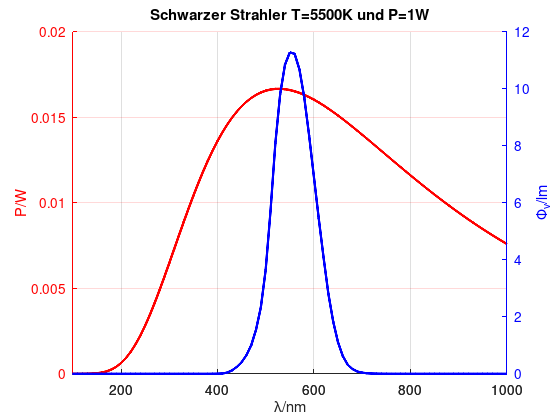

In [11]:
lambda=[100:10:1000];
black_body(5500,1,lambda);